<a href="https://colab.research.google.com/github/GiselePicech/ProcesamientoPesquero/blob/main/Pesquera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#Ingesta de datos
pesca2 = pd.read_excel('/content/drive/MyDrive/SMyS/maestro_produccion_total.xlsx')

In [12]:
#Muestra de datos
pesca2.head()

,Fecha,RInt,Dueño2,Materia Prima,Cj,P-C,KgBr,Desp,KgN,ProductoTerminado,IAC,KGT,Rinde
0,2022-07-22,5504.0,17.0,Almeja entera fresca,41.0,46.8,1918.8,0.0,1918.8,Almeja 1/2 valva IQF,1432.0,842.0,0.438816
1,2022-08-12,5549.0,10.0,Almeja entera fresca,53.0,48.8,2586.4,0.0,2586.4,Almeja 1/2 valva IQF,1438.0,216.0,0.083514
2,2022-05-01,5331.0,6.0,Almeja entera fresca,10.0,45.0,450.0,0.0,450.0,Almeja entera fresca,1.0,450.0,1.000000
3,2022-03-28,5240.0,14.0,Almeja entera fresca,4.0,40.0,160.0,0.0,160.0,Almeja entera fresca,1.0,160.0,1.000000
4,2022-04-07,5262.0,11.0,Almeja entera fresca,7.0,40.0,280.0,0.0,280.0,Almeja entera fresca,1.0,280.0,1.000000


In [13]:
#Tipos de datos
pesca2.dtypes

Fecha                 datetime64[ns]
RInt                         float64
Dueño2                       float64
Materia Prima                 object
Cj                           float64
P-C                          float64
KgBr                         float64
Desp                         float64
KgN                          float64
ProductoTerminado             object
IAC                          float64
KGT                          float64
Rinde                        float64
dtype: object

In [14]:
#Cantidad de registros y columnas
pesca2.shape

(4123, 13)

In [15]:
pesca1 = pesca2.drop("RInt", axis=1)

In [16]:
pesca = pesca1.drop("IAC", axis=1)

In [17]:
#Cantidad de registros y columnas
pesca.shape

(4123, 11)

In [18]:
#Medidas generales
pesca.describe()

,Dueño2,Cj,P-C,KgBr,Desp,KgN,KGT,Rinde
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,22.584768,201.781955,22.859300,3958.103398,0.044365,3884.416765,915.575089,0.342182
std,14.505626,233.437374,7.957239,4329.189272,0.085549,4348.269676,1260.232877,0.697294
min,1.000000,1.000000,4.000000,4.000000,0.000000,4.000000,0.000000,0.000000
25%,10.000000,31.000000,17.405000,799.000000,0.000000,721.150000,180.000000,0.084555
50%,16.000000,83.000000,21.000000,2124.000000,0.000000,1930.000000,432.000000,0.205192
75%,34.000000,312.000000,27.000000,5814.000000,0.070000,5756.335000,1070.500000,0.441937
max,55.000000,1200.000000,193.000000,22701.000000,0.680000,22701.000000,14030.000000,39.483333


In [19]:
#Control de valores nulos
pesca.isna().sum()

Fecha                 0
Dueño2                0
Materia Prima         0
Cj                    0
P-C                   0
KgBr                  0
Desp                  0
KgN                   0
ProductoTerminado     0
KGT                   0
Rinde                 0
dtype: int64

In [20]:
#Cantidad de valores unicos por rango
pesca.nunique()

Fecha                  920
Dueño2                  54
Materia Prima          120
Cj                     474
P-C                    661
KgBr                  2066
Desp                   255
KgN                   2357
ProductoTerminado      366
KGT                   1185
Rinde                 3224
dtype: int64

In [21]:
#Matriz de correlacion - Metodo Pearson
pesca_df2=pd.DataFrame(pesca)
pesca_df2.corr(method = 'pearson')

,Dueño2,Cj,P-C,KgBr,Desp,KgN,KGT,Rinde
Dueño2,1.000000,0.629483,-0.319051,0.600919,-0.335315,0.607894,0.353597,-0.142677
Cj,0.629483,1.000000,-0.352433,0.970232,-0.324487,0.972438,0.581197,-0.182117
P-C,-0.319051,-0.352433,1.000000,-0.227193,0.529121,-0.244944,-0.160798,-0.041319
KgBr,0.600919,0.970232,-0.227193,1.000000,-0.275242,0.999088,0.606075,-0.190347
Desp,-0.335315,-0.324487,0.529121,-0.275242,1.000000,-0.307807,-0.231247,-0.068655
KgN,0.607894,0.972438,-0.244944,0.999088,-0.307807,1.000000,0.607619,-0.187422
KGT,0.353597,0.581197,-0.160798,0.606075,-0.231247,0.607619,1.000000,0.092686
Rinde,-0.142677,-0.182117,-0.041319,-0.190347,-0.068655,-0.187422,0.092686,1.000000


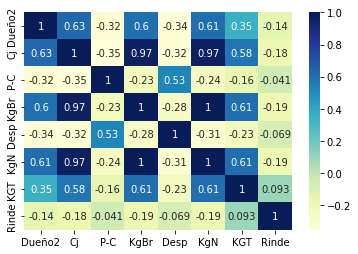

In [22]:
#Matriz de correlacion - Metodo Pearson VISUALIZACION
import seaborn as sns
sns.heatmap(pesca.corr(), annot=True, cmap="YlGnBu")
plt.show()

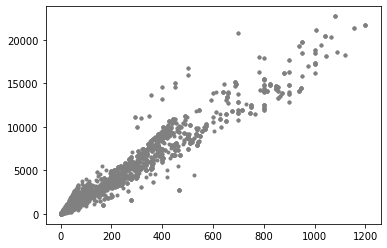

In [23]:
#Grafico de puntos - Cantidad de cajones vs. Kg Netos
plt.scatter(pesca.Cj ,pesca.KgN, marker=".",facecolor='gray')
plt.show()

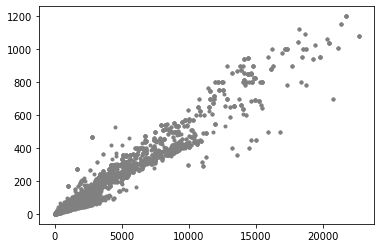

In [24]:
#Grafico de puntos - KG Brutos vs. Cantidad de Cajones
plt.scatter(pesca.KgBr ,pesca.Cj, marker=".",facecolor='gray')
plt.show()

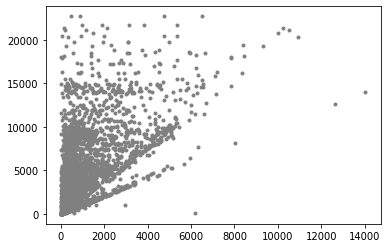

In [25]:
#Grafico de puntos - KG Terminados vs. Kg Netos
plt.scatter(pesca.KGT,pesca.KgN, marker=".",facecolor='gray')
plt.show()

In [26]:
#Suma de Rinde por Dueno
pesca[['Dueño2','Rinde']].groupby('Dueño2').sum().sort_values('Rinde', ascending=False)

,Rinde
Dueño2,
10.0,410.908728
43.0,107.134373
16.0,99.771139
18.0,92.916314
6.0,91.988687
5.0,77.314538
34.0,75.751462
19.0,45.492117
30.0,39.504141


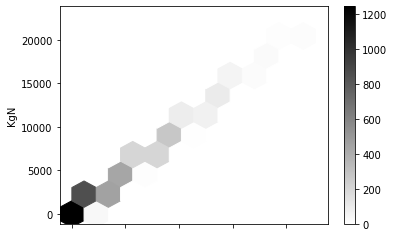

In [27]:
#Grafico de hexagonos - KG Brutos vs. Kg Netos
pesca.plot.hexbin(x='KgBr', y='KgN', gridsize=10,cmap="gist_yarg")
plt.show()

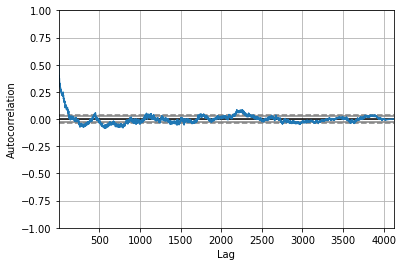

In [28]:
#Grafico de Autocorrelacion - Desperdicio
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(pesca.Desp)
plt.show()

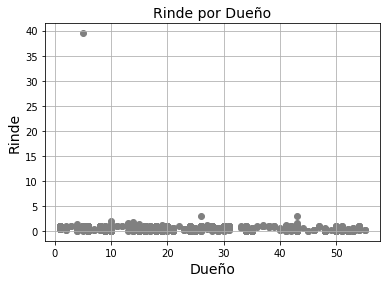

In [29]:
#Grafico de puntos - Duenos vs. Rinde
df = pd.DataFrame(pesca,columns=['Dueño2','Rinde'])
plt.scatter(df['Dueño2'], df['Rinde'], color='grey', marker='o')
plt.title('Rinde por Dueño', fontsize=14)
plt.xlabel('Dueño', fontsize=14)
plt.ylabel('Rinde', fontsize=14)
plt.grid(True)
plt.show()

In [30]:
sns.set()

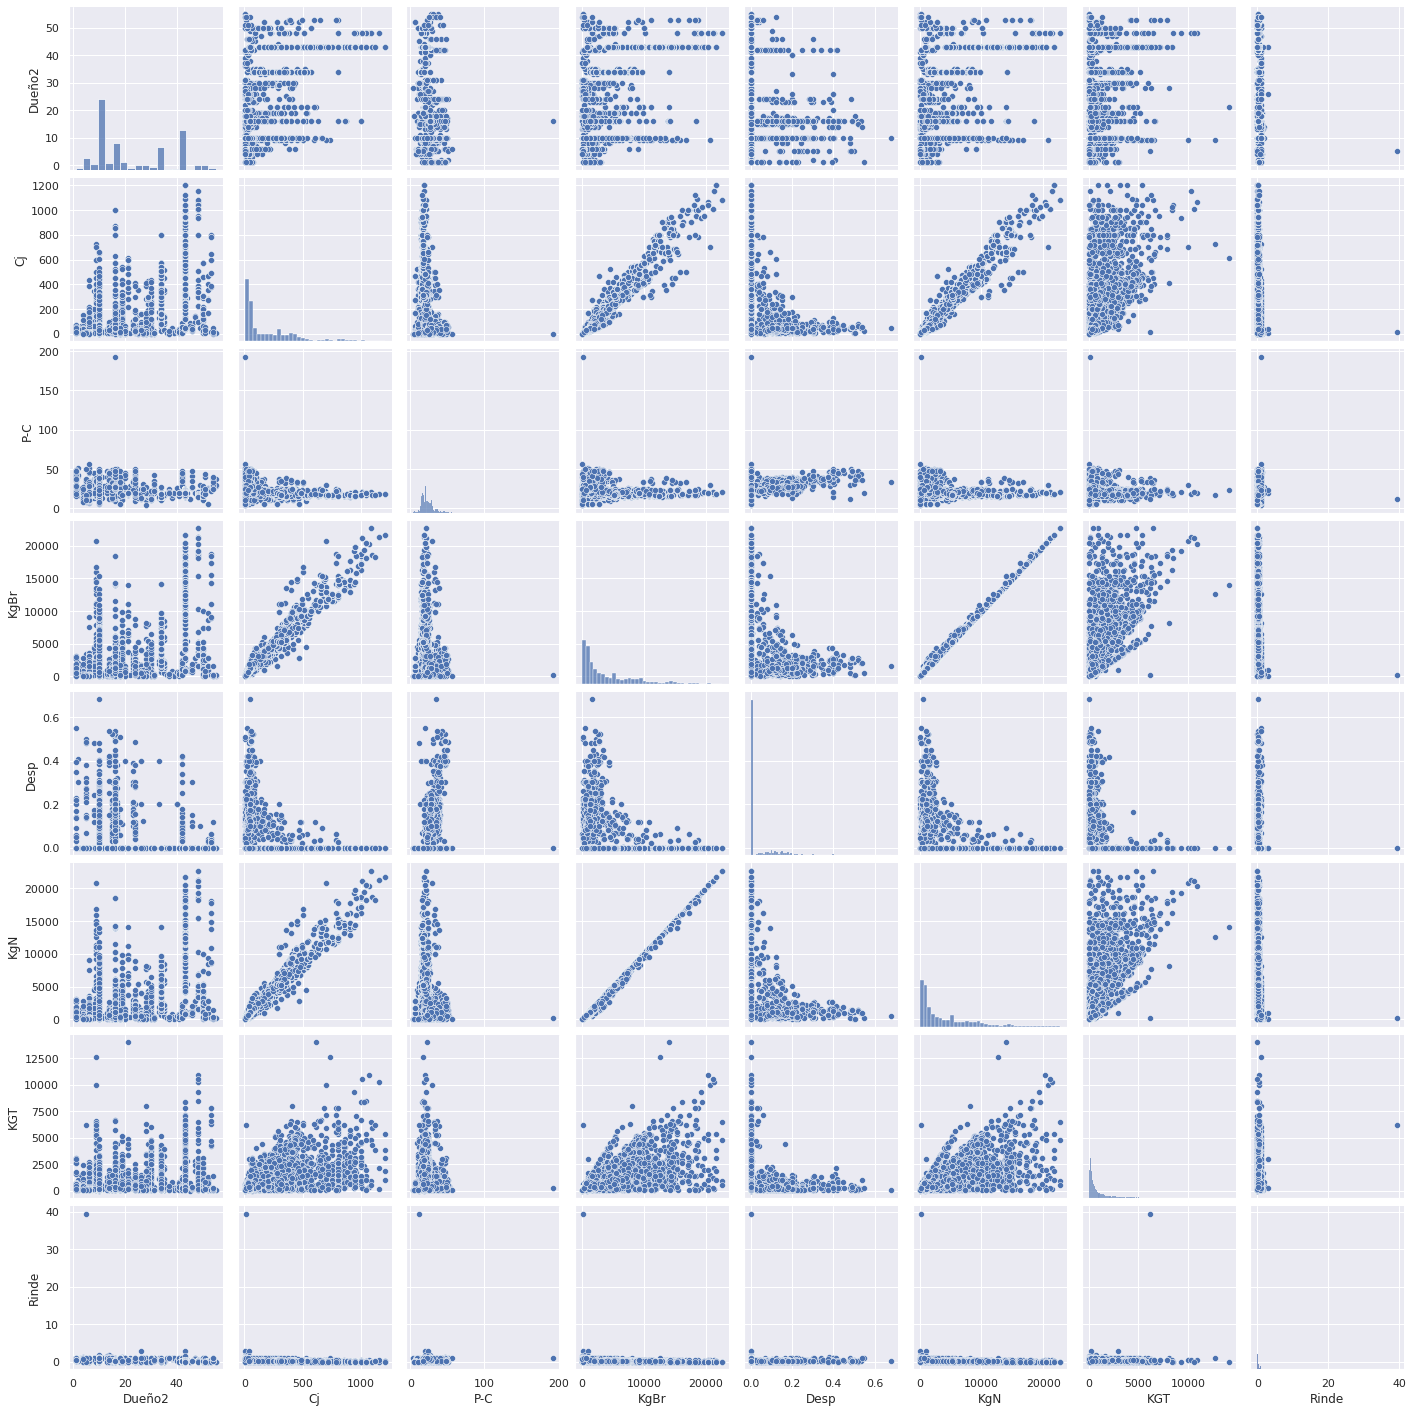

In [31]:
sns.pairplot(pesca)
plt.show()